In [ ]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
# from dynamic_routing_analysis import decoding_utils
# from dynamic_routing_analysis import plot_utils
# import dynamic_routing_analysis as dra
# import pingouin as pg
import os

import matplotlib
import matplotlib.font_manager as fm

matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fm.FontProperties().set_family('arial')

%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [3]:
# results_path="s3://aind-scratch-data/dynamic-routing/decoding/results/keep_units_consistent_test_20250605_170828/" # 20 units
# results_path="s3://aind-scratch-data/dynamic-routing/decoding/results/keep_units_consistent_test_20250605_185958/" #all units
## rerun with mapping from unit id to spikes definitely preserved
# results_path = "s3://aind-scratch-data/dynamic-routing/decoding/results/keep_units_consistent_test_20250612_231749/" # all units
# results_path = "s3://aind-scratch-data/dynamic-routing/decoding/results/keep_units_consistent_test_20250613_173938/" # 20 units

results_path = "s3://aind-scratch-data/dynamic-routing/decoding/results/time_mod_keep_units_consistent_0/" # 20 units; all sessions

In [4]:
session_table_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\session_table_v0.268.csv"
# session_table_path="/Users/ethan.mcbride/Data/DR/session_table_v0.265.csv"
session_table=pl.read_csv(session_table_path)

dr_session_list=(
    session_table.filter(
    pl.col('project')=="DynamicRouting",
    pl.col('is_production'),
    pl.col('is_annotated'),
    pl.col('issues')=="",
    # pl.col('is_good_behavior').eq(True),
    )['session_id'].to_list()
    )

In [424]:
session_table.filter(
    pl.col('project')=='Templeton'
)

session_id,is_production,project,date,time,subject_id,subject_age_days,subject_sex,subject_genotype,implant,rig,experimenters,notes,issues,allen_path,cloud_path,task_version,ephys_day,behavior_day,epochs,is_ephys,is_deep_insertions,is_sync,is_video,is_templeton,is_annotated,is_hab,is_task,is_invalid_times,is_naive,is_context_naive,is_late_autorewards,is_spontaneous,is_spontaneous_rewards,is_rf_mapping,is_optotagging,is_optotagging_control,is_opto_perturbation,is_injection_perturbation,is_opto_control,is_injection_control,probe_letters_available,probe_letters_to_skip,probe_letters_annotated,deep_probe_letters_to_skip,areas_perturbed,areas_recorded,task_duration,mean_vis_dprime,mean_aud_dprime,n_passing_blocks,cross_modality_dprime_vis_blocks,cross_modality_dprime_aud_blocks,n_hits,n_contingent_rewards,n_responses,n_trials,is_first_block_aud,is_first_block_vis,is_engaged,is_good_behavior,is_bad_behavior,is_stage_5_passed
str,bool,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,i64,i64,str,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,str,str,str,str,str,str,f64,f64,f64,i64,str,str,str,str,str,str,bool,bool,bool,bool,bool,bool
"""620263_2022-07-26""",true,"""Templeton""","""2022-07-26""","""14:08:55""",620263,173,"""F""","""wt/wt""",null,"""NP3""","""Jackie Kuyat""",null,"""""","""//allen/programs/mindscope/wor…","""s3://aind-ephys-data/ecephys_6…","""templeton stage 2 vis maxvol""",1,null,"""DynamicRouting1""",true,false,true,true,true,true,false,true,false,false,true,false,false,false,false,false,false,false,false,false,false,"""BCF""","""ADE""","""BCF""","""""",null,"""ACAd;ACAv;CA1;CA3;DG;IG;LSr;MO…",3617.06601,3.854814,NaN,0,"""""","""""","""157.0""","""152.0""","""191.0""","""673.0""",false,true,false,false,false,false
"""620263_2022-07-27""",true,"""Templeton""","""2022-07-27""","""13:56:52""",620263,174,"""F""","""wt/wt""",null,"""NP3""","""Jackie Kuyat""",null,"""""","""//allen/programs/mindscope/wor…","""s3://aind-ephys-data/ecephys_6…","""templeton stage 2 vis maxvol""",2,null,"""DynamicRouting1""",true,false,true,true,true,true,false,true,false,false,true,false,false,false,false,false,false,false,false,false,false,"""ABCF""","""DE""","""ABCF""","""""",null,"""AD;AUDd;DP;ILA;MB;MOp;MOs;NB;O…",3617.0485,3.850702,NaN,0,"""""","""""","""155.0""","""150.0""","""171.0""","""692.0""",false,true,false,false,false,false
"""620264_2022-08-02""",true,"""Templeton""","""2022-08-02""","""15:39:59""",620264,180,"""F""","""wt/wt""",null,"""NP3""","""Jackie Kuyat""",null,"""""","""//allen/programs/mindscope/wor…","""s3://aind-ephys-data/ecephys_6…","""templeton stage 2 aud record""",1,null,"""DynamicRouting1""",true,false,true,true,true,true,false,true,false,false,true,false,false,false,false,false,false,false,false,false,false,"""ABCF""","""DE""","""ABCF""","""""",null,"""AUDd;CA1;CP;DG;FRP;HPF;MOs;OLF…",3617.13287,NaN,4.963481,0,"""""","""""","""160.0""","""155.0""","""166.0""","""702.0""",true,false,false,false,false,false
"""628801_2022-09-19""",true,"""Templeton""","""2022-09-19""","""13:47:54""",628801,164,"""M""","""wt/wt""","""Templeton""","""NP3""","""Jackie Kuyat""",null,"""""","""//allen/programs/mindscope/wor…","""s3://aind-ephys-data/ecephys_6…","""templeton stage 2 vis rewardPr…",1,null,"""DynamicRouting1;RFMapping""",true,false,true,true,true,true,false,true,false,false,true,false,false,false,true,false,false,false,false,false,false,"""ABCF""","""DE""","""ABCF""","""""",null,"""ACAd;AUDp;AUDpo;CA1;CA2;DG;LP;…",3609.59495,1.927292,NaN,0,"""""","""""","""102.0""","""99.0""","""267.0""","""454.0""",false,true,false,false,false,false
"""628801_2022-09-20""",true,"""Templeton""","""2022-09-20""","""13:21:19""",628801,165,"""M""","""wt/wt""","""Templeton""","""NP3""","""Jackie Kuyat""","""; https://github.com/AllenInst…","""https://github.com/AllenInstit…","""//allen/programs/mindscope/wor…","""s3://aind-ephys-data/ecephys_6…","""templeton stage 2 vis rew

In [101]:
all_session_list=(
    session_table.filter(
    # pl.col('project')=="DynamicRouting",
    pl.col('is_production'),
    pl.col('is_annotated'),
    pl.col('issues')=="",
    # pl.col('is_good_behavior').eq(True),
    )['session_id'].to_list()
    )

len(all_session_list)

178

In [5]:
#define grouping columns
grouping_cols = {
    'session_id',
    'structure',
    'electrode_group_names',
    'unit_subsample_size',
    'bin_center',
    'bin_size',
    'time_aligned_to',
    'coefs',
    'unit_ids',
}

#toggle combine_multi_probe_rec
combine_multi_probe_rec = True

if combine_multi_probe_rec:
    combine_multi_probe_expr = pl.col('electrode_group_names').list.len().gt(1) | pl.col('is_sole_recording').eq(True)
else:
    combine_multi_probe_expr = pl.col('electrode_group_names').list.len().eq(1) | pl.col('is_sole_recording').eq(True)


In [422]:
#get single session, keep coefs (and unit ids?)

#include repeats, but don't need predict_proba

#one row per repeat, with coefs and unit ids

### make separate query to include repeats - specify session
# sel_session='742903_2024-10-22' #the golden session
sel_session='670180_2023-07-27' #a templeton session
decoder_coefs = (
    pl.scan_parquet(results_path)
    .filter(
        pl.col('session_id').eq(sel_session),
    )
    .with_columns(
        pl.col('electrode_group_names').flatten().n_unique().eq(1).over(grouping_cols - {'electrode_group_names'}).alias('is_sole_recording'),     
    )
    .filter(
        combine_multi_probe_expr,
        pl.col('is_all_trials').eq(True),
    )

    .sort('structure', 'shift_idx', 'repeat_idx', 'time_aligned_to', 'bin_center', descending=False, maintain_order=True)
    .collect()
    .with_columns([
        pl.col("electrode_group_names").list.n_unique().alias("n_probes"),
        pl.col("electrode_group_names")
        .list.eval(pl.element().str.replace("probe", ""))
        .list.join("")
        .alias("probe")
    ])
)

In [423]:
decoder_coefs

balanced_accuracy_test,balanced_accuracy_train,time_aligned_to,bin_size,bin_center,shift_idx,repeat_idx,predict_proba,trial_indices,unit_ids,coefs,is_all_trials,session_id,structure,electrode_group_names,unit_subsample_size,unit_criteria,is_sole_recording,n_probes,probe
f64,f64,enum,f64,f64,i16,u16,list[f64],list[u16],list[str],list[f64],bool,str,str,list[str],u16,str,bool,u32,str
0.598777,0.625668,"""stim_start_time""",0.5,-1.25,null,0,"[0.409064, 0.883385, … 0.260352]","[0, 1, … 689]","[""670180_2023-07-27_F-1245"", ""670180_2023-07-27_F-1246"", … ""670180_2023-07-27_F-928""]","[-0.116479, -0.235499, … 0.223088]",true,"""670180_2023-07-27""","""ACAd""","[""probeF""]",20,"""loose_drift""",true,1,"""F"""
0.611779,0.64028,"""stim_start_time""",0.5,-0.75,null,0,"[0.843356, 0.724852, … 0.228415]","[0, 1, … 689]","[""670180_2023-07-27_F-1245"", ""670180_2023-07-27_F-1246"", … ""670180_2023-07-27_F-928""]","[0.212105, 0.004967, … 0.151261]",true,"""670180_2023-07-27""","""ACAd""","[""probeF""]",20,"""loose_drift""",true,1,"""F"""
0.58447,0.630799,"""stim_start_time""",0.5,-0.25,null,0,"[0.596195, 0.539622, … 0.204393]","[0, 1, … 689]","[""670180_2023-07-27_F-1245"", ""670180_2023-07-27_F-1246"", … ""670180_2023-07-27_F-928""]","[0.490863, 0.020761, … 0.220849]",true,"""670180_2023-07-27""","""ACAd""","[""probeF""]",20,"""loose_drift""",true,1,"""F"""
0.606214,0.647416,"""stim_start_time""",0.5,0.25,null,0,"[0.737731, 0.418406, … 0.766768]","[0, 1, … 689]","[""670180_2023-07-27_F-1245"", ""670180_2023-07-27_F-1246"", … ""670180_2023-07-27_F-928""]","[0.290778, -0.078941, … -0.182332]",true,"""670180_2023-07-27""","""ACAd""","[""probeF""]",20,"""loose_drift""",true,1,"""F"""
0.587288,0.619198,"""stim_start_time""",0.5,0.75,null,0,"[0.676128, 0.572066, … 0.114954]","[0, 1, … 689]","[""670180_2023-07-27_F-1245"", ""670180_2023-07-27_F-1246"", … ""670180_2023-07-27_F-928""]","[-0.18153, -0.087783, … 0.043248]",true,"""670180_2023-07-27""","""ACAd""","[""probeF""]",20,"""loose_drift""",true,1,"""F"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0.537563,0.592122,"""stim_start_time""",0.5,3.25,null,24,"[0.672193, 0.531969, … 0.838636]","[0, 1, … 689]","[""670180_2023-07-27_B-112"", ""670180_2023-07-27_B-117"", … ""670180_2023-07-27_B-75""]","[0.0385, 0.09928, … -0.19497]",true,"""670180_2023-07-27""","""VPM""","[""probeB""]",20,"""loose_drift""",true,1,"""B"""
0.547312,0.607324,"""stim_start_time""",0.5,3.75,null,24,"[0.317888, 0.66749, … 0.419918]","[0, 1, … 689]","[""670180_2023-07-27_B-112"", ""670180_2023-07-27_B-117"", … ""670180_2023-07-27_B-75""]","[0.169543, -0.252599, … -0.050189]",true,"""670180_2023-07-27""","""VPM""","[""probeB""]",20,"""loose_drift""",true,1,"""B"""
0.561847,0.610971,"""stim_start_time""",0.5,4.25,null,24,"[0.40699, 0.408406, … 0.32845]","[0, 1, … 689]","[""670180_2023-07-27_B-112"", ""670180_2023-07-27_B-117"", … ""670180_2023-07-27_B-75""]","[0.173973, -0.197295, … 0.021543]",true,"""670180_2023-07-27""","""VPM""","[""probeB""]",20,"""loose_drift""",true,1,"""B"""


In [225]:
decoder_coefs_pd=decoder_coefs.to_pandas()

In [ ]:
# savepath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\keep_units_consistent_test_2025-06-05_170828\decoder_coefs.parquet"
# savepath="/Users/ethan.mcbride/Data/DR/keep_units_consistent_test_2025-06-05_170828/decoder_coefs.parquet"
# savepath="/Users/ethan.mcbride/Data/DR/keep_units_consistent_test_20250605_185958/decoder_coefs.parquet"
# decoder_coefs_pd.to_parquet(savepath)

In [ ]:
# decoder_coefs_pd=pd.read_parquet("/Users/ethan.mcbride/Data/DR/keep_units_consistent_test_2025-06-05_170828/decoder_coefs.parquet")
# decoder_coefs_pd=pd.read_parquet(r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR CO decoding results\keep_units_consistent_test_20250605_185958\decoder_coefs.parquet")

In [188]:
# for each repeat, 

# get the balanced accuracy test & train, plus the coefs and unit ids across timebins

# check the unit ids are the same across all timebins

# compute the correlation of the coefs to the first timebin


# start with one repeat, one structure

sel_structure='ACAd'
sel_repeat=0
sel_shift_idx=0
# sel_time_bin=-0.25
sel_time_aligned_to='stim_start_time'


In [228]:
sel_structure='PL'
sel_time_aligned_to='stim_start_time'
sel_repeat=0
sel_probe_ind=0

structure_results=decoder_coefs_pd.query(
    f"structure=='{sel_structure}' & repeat_idx=={sel_repeat} & shift_idx.isna() & time_aligned_to=='{sel_time_aligned_to}'"
).sort_values(by='bin_center')

unique_probes=structure_results['probe'].unique()
if len(unique_probes)>1:
    if len(unique_probes)>sel_probe_ind:
        structure_results=structure_results.query(f"probe=='{unique_probes[sel_probe_ind]}'")
    else:
        structure_results=structure_results.query(f"probe=='{unique_probes[0]}'")

structure_results['coefs'].iloc[0]

array([ 0.05873833,  0.0264927 ,  0.05454082, -0.35939641, -0.18894665,
       -0.29784494, -0.03427307,  0.0952884 , -0.05737521,  0.52341671,
       -0.01566685, -0.15220086,  0.21470265,  0.4476493 , -0.09484205,
       -0.06038361,  0.34240509,  0.19171169,  0.41294501, -0.39855642])

In [204]:
# structure_results

Text(0.5, 1.0, 'PL; repeat 0; time bin center -1.25')

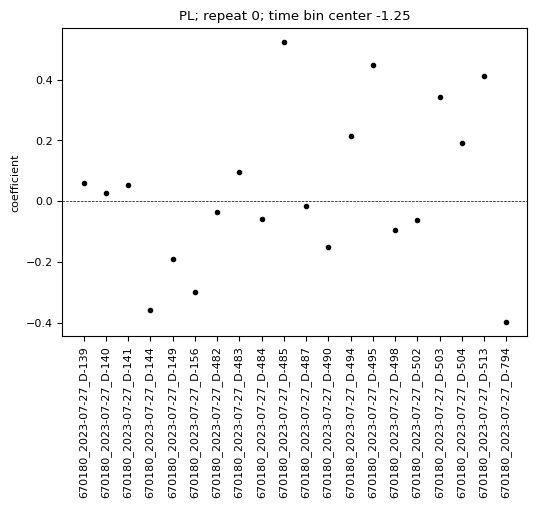

In [229]:
sel_time_bin=0

fig,ax=plt.subplots(figsize=(6,4))
ax.axhline(0, color='k', linestyle='--', linewidth=0.5)
ax.plot(structure_results['coefs'].iloc[sel_time_bin],'k.')

ax.set_xticks(np.arange(0, len(structure_results['coefs'].iloc[0])))
ax.set_xticklabels(structure_results['unit_ids'].iloc[0], rotation=90)

ax.set_ylabel('coefficient')

ax.set_title(f"{sel_structure}; repeat {sel_repeat}; time bin center {structure_results['bin_center'].iloc[sel_time_bin]}")

Text(0.5, 1.0, 'r=-0.07, p=7.60e-01')

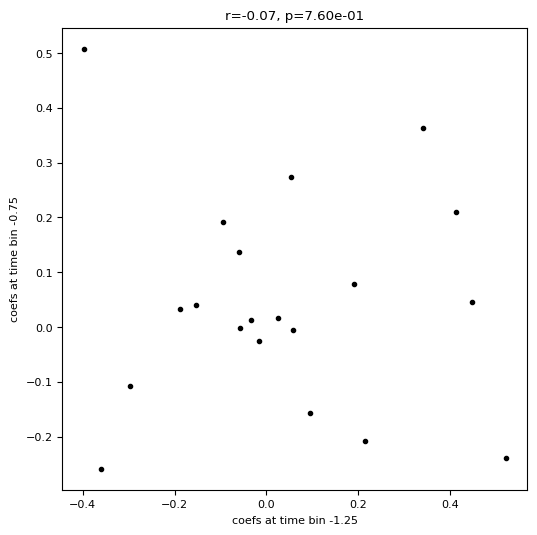

In [230]:
# correlation between first and second time bin
sel_time_bin_0=0
sel_time_bin_1=1

coefs_0 = structure_results['coefs'].iloc[sel_time_bin_0]
coefs_1 = structure_results['coefs'].iloc[sel_time_bin_1]

r,p= stats.pearsonr(coefs_0, coefs_1)

fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.plot(coefs_0, coefs_1, 'k.')

ax.set_xlabel(f"coefs at time bin {structure_results['bin_center'].iloc[sel_time_bin_0]}")
ax.set_ylabel(f"coefs at time bin {structure_results['bin_center'].iloc[sel_time_bin_1]}")
ax.set_title(f"r={r:.2f}, p={p:.2e}")

In [209]:
structure_results['unit_ids'].iloc[0]

array(['670180_2023-07-27_D-139', '670180_2023-07-27_D-140',
       '670180_2023-07-27_D-141', '670180_2023-07-27_D-144',
       '670180_2023-07-27_D-149', '670180_2023-07-27_D-156',
       '670180_2023-07-27_D-482', '670180_2023-07-27_D-483',
       '670180_2023-07-27_D-484', '670180_2023-07-27_D-485',
       '670180_2023-07-27_D-487', '670180_2023-07-27_D-490',
       '670180_2023-07-27_D-494', '670180_2023-07-27_D-495',
       '670180_2023-07-27_D-498', '670180_2023-07-27_D-502',
       '670180_2023-07-27_D-503', '670180_2023-07-27_D-504',
       '670180_2023-07-27_D-513', '670180_2023-07-27_D-794'], dtype=object)

In [ ]:
# decoder_coefs_pd.query(f'structure == "{sel_structure}" and repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')['unit_ids']
# decoder_coefs_pd.query(f'structure == "{sel_structure}" and bin_center == {sel_time_bin}')

In [ ]:
# unit_ids=decoder_coefs_pd.query(f'structure == "{sel_structure}" and repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')['unit_ids']

# unit_ids=decoder_coefs_pd.query(f'structure == "{sel_structure}" and bin_center == {sel_time_bin} and \
#                                 repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')['unit_ids'].values

unit_ids=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx == {sel_shift_idx} and \
                                repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')['unit_ids'].values

sorted_unit_ids=[]

for uu in unit_ids:
    sorted_unit_ids.append(np.sort(uu))

sorted_unit_ids==sorted_unit_ids[0]

In [ ]:
# random_unit_ids=np.array([3,1,1,7,13,20]).tolist()
# all_unit_ids=np.arange(0,30).tolist()

# [all_unit_ids.index(unit_id) for unit_id in random_unit_ids]
# # sel_rows['electrode_group_names'].iloc[0]


In [ ]:
# np.searchsorted(all_unit_ids, random_unit_ids)

In [215]:
### TODO: deal with multiple probes per area
decoder_coefs_pd['electrode_group_names'].iloc[0]

array(['probeF'], dtype=object)

In [ ]:
probestr=''
n_probes=0
for pr in np.array(['probeA','probeB','probeC']):
    probestr=probestr+pr[-1]
    n_probes=n_probes+1

print(probestr,n_probes)

In [190]:
probe_str_list=[]
n_probes_list=[]
for rr, row in decoder_coefs_pd.iterrows():
    n_probes=0
    probe_str=''
    for pr in row['electrode_group_names']:
        probe_str=probe_str+pr[-1]
        n_probes=n_probes+1

    probe_str_list.append(probe_str)
    n_probes_list.append(n_probes)

decoder_coefs_pd['probe']=probe_str_list
decoder_coefs_pd['n_probes']=n_probes_list

In [ ]:
decoder_coefs_pd[['electrode_group_names','probe','n_probes']]

In [ ]:
decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()

In [212]:
decoder_coefs_pd[['structure','probe']].value_counts()

structure  probe
ACAd       F        350
MOs        D        350
VISp       C        350
VISa       B        350
PO         B        350
PL         D        350
ORBvl      D        350
ORBm       D        350
MOs        F        350
           E        350
           DEF      350
MOp        E        350
ACAv       F        350
LSr        F        350
LD         B        350
DG         C        350
           BC       350
CP         E        350
CA3        BC       350
CA1        C        350
           BC       350
           B        350
VPM        B        350
Name: count, dtype: int64

In [ ]:
#plot raw coefs



Text(0.5, 1.0, 'VISp; 670180_2023-07-27; probeC; repeat 0; shift_idx 0')

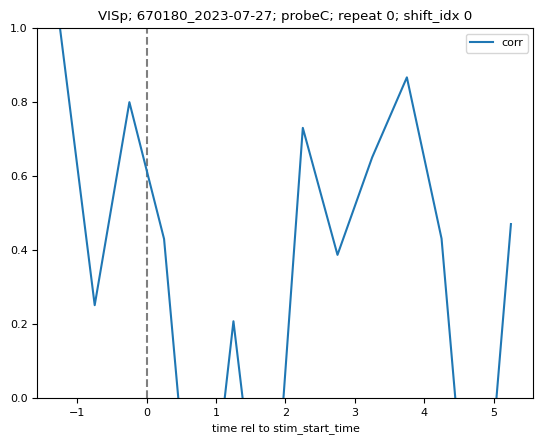

In [231]:
sel_structure='VISp'
sel_repeat=0
sel_shift_idx=0
# sel_time_bin=-0.25
sel_time_aligned_to='stim_start_time'

#if multiple probes, select the first one
sel_probe_ind=2
unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()
if len(unique_probes)>sel_probe_ind:
    probe_str=unique_probes[sel_probe_ind]
else:
    probe_str=unique_probes[0]

#select bin index to compare to
sel_comp_ind=0

sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx.isna() and \
                                repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')

if len(unique_probes)>1:
    sel_rows=sel_rows.query('probe==@probe_str')

corr_coefs=[]

# initial_sort_inds=np.argsort(sel_rows['unit_ids'].values[sel_comp_ind])

initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]
# initial_coefs=sel_rows['coefs'].values[sel_comp_ind][initial_sort_inds]
# initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind][initial_sort_inds]

for idx, row in sel_rows.iterrows():
    
    # sort_inds=np.argsort(row['unit_ids'])
    unit_ids=row['unit_ids']
    coefs=row['coefs']
    # unit_ids=row['unit_ids'][sort_inds]
    # coefs=row['coefs'][sort_inds]
    
    if np.array_equal(initial_unit_ids, unit_ids):
    # if np.array_equal(initial_unit_ids, unit_ids):
        corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
    else:
        print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
        corr_coefs.append(np.nan)


fig,ax=plt.subplots(1,1)
ax.axvline(0,color='k',linestyle='--',alpha=0.5)
ax.plot(sel_rows['bin_center'],np.array(corr_coefs),label='corr')
# ax.plot(sel_rows['bin_center'],sel_rows['balanced_accuracy_test'],label='test_accuracy')
# ax.plot(sel_rows['bin_center'],sel_rows['balanced_accuracy_train'],label='train_accuracy')

ax.set_ylim([0,1])

ax.legend()
ax.set_xlabel('time rel to '+sel_time_aligned_to)
ax.set_title(sel_structure+'; '+sel_session+'; probe'+probe_str+'; repeat '+str(sel_repeat)+'; shift_idx '+str(sel_shift_idx))

Text(0, 0.5, 'corr to first time bin coefs')

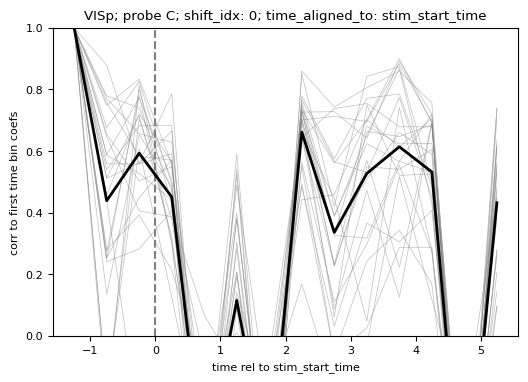

In [232]:
#show all repeats? do for if using 20 units

sel_structure='VISp'
sel_shift_idx=0
sel_comp_ind=0
sel_probe_ind=2

#if multiple probes, select the first one
unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()
if len(unique_probes)>sel_probe_ind:
    probe_str=unique_probes[sel_probe_ind]
else:
    probe_str=unique_probes[0]

repeats = decoder_coefs_pd['repeat_idx'].unique()

all_corr_coefs = []

for sel_repeat in repeats:
    sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx.isna() and \
                                    repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')
    
    if len(unique_probes)>1:
        sel_rows=sel_rows.query('probe==@probe_str')
    
    initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
    initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]

    corr_coefs=[]

    for idx, row in sel_rows.iterrows():
        
        unit_ids=row['unit_ids']
        coefs=row['coefs']
        
        if np.array_equal(initial_unit_ids, unit_ids):
            corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
        else:
            print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
            corr_coefs.append(np.nan)

    all_corr_coefs.append(np.array(corr_coefs))


fig,ax=plt.subplots(1,1,figsize=(6,4))
ax.axvline(0,color='k',linestyle='--',alpha=0.5)
ax.plot(sel_rows['bin_center'],np.vstack(all_corr_coefs).T, color='gray', alpha=0.5, linewidth=0.5)
ax.plot(sel_rows['bin_center'],np.mean(np.vstack(all_corr_coefs),axis=0), color='black', alpha=1, linewidth=2)

ax.set_ylim([0,1]) 
ax.set_title(f"{sel_structure}; probe {probe_str}; shift_idx: {sel_shift_idx}; time_aligned_to: {sel_time_aligned_to}")
ax.set_xlabel('time rel to '+sel_time_aligned_to)
ax.set_ylabel('corr to first time bin coefs')


In [183]:
#heatmap - use each time bin to compute correlation

sel_structure='CP'
sel_shift_idx=0
sel_probe_ind=0

#if multiple probes, select the first one
unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()
if len(unique_probes)>sel_probe_ind:
    probe_str=unique_probes[sel_probe_ind]
else:
    probe_str=unique_probes[0]

repeats = decoder_coefs_pd['repeat_idx'].unique()

heatmap_array=[]

for sel_comp_ind in range(len(decoder_coefs_pd['bin_center'].unique())):

    all_corr_coefs = []

    for sel_repeat in repeats:
        sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx.isna() and \
                                        repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')
        
        if len(unique_probes)>1:
            sel_rows=sel_rows.query('probe==@probe_str')
        
        initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
        initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]

        corr_coefs=[]

        for idx, row in sel_rows.iterrows():
            
            unit_ids=row['unit_ids']
            coefs=row['coefs']
            
            if np.array_equal(initial_unit_ids, unit_ids):
                corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
            else:
                print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
                corr_coefs.append(np.nan)

        all_corr_coefs.append(np.array(corr_coefs))

    heatmap_array.append(np.mean(np.vstack(all_corr_coefs), axis=0))

heatmap_array=np.vstack(heatmap_array)




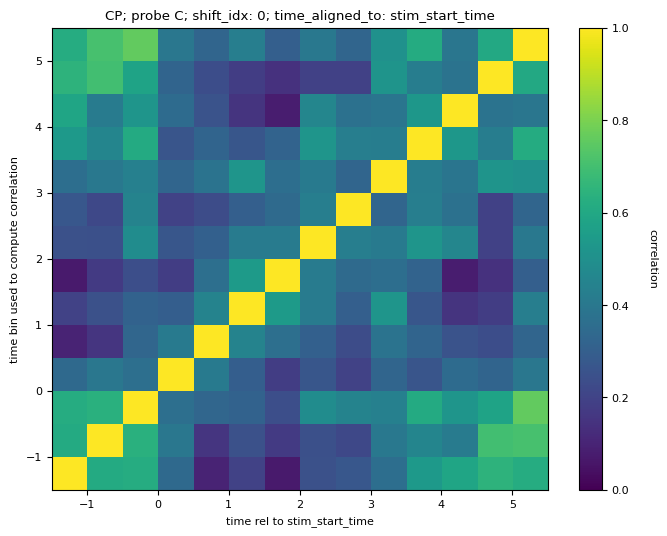

In [184]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
im=ax.imshow(heatmap_array, aspect='auto', cmap='viridis', interpolation='none', vmin=0, vmax=1,
             extent=[sel_rows['bin_center'].min()-0.25, sel_rows['bin_center'].max()+0.25, 
                     sel_rows['bin_center'].max()+0.25, sel_rows['bin_center'].min()-0.25, ])
ax.invert_yaxis()

ax.set_title(f"{sel_structure}; probe {probe_str}; shift_idx: {sel_shift_idx}; time_aligned_to: {sel_time_aligned_to}")
ax.set_xlabel('time rel to '+sel_time_aligned_to)
ax.set_ylabel('time bin used to compute correlation')

#colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('correlation', rotation=270, labelpad=20)

In [ ]:
heatmap_array

In [ ]:
#show all shifts

sel_structure='PL'
sel_repeat=0
sel_comp_ind=0
sel_probe_ind=0

#if multiple probes, select the first one
sel_probe_ind=0
unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()
if len(unique_probes)>sel_probe_ind:
    probe_str=unique_probes[sel_probe_ind]
else:
    probe_str=unique_probes[0]

shift_inds = decoder_coefs_pd['shift_idx'].unique()

all_corr_coefs = []

for sel_shift_idx in shift_inds:
    sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx == {sel_shift_idx} and \
                                    repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')
    
    if len(unique_probes)>1:
        sel_rows=sel_rows.query('probe==@probe_str')
    
    initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
    initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]

    corr_coefs=[]

    for idx, row in sel_rows.iterrows():
        
        unit_ids=np.sort(row['unit_ids'])
        coefs=row['coefs']
        
        if np.array_equal(np.sort(initial_unit_ids), unit_ids):
            corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
        else:
            print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
            corr_coefs.append(np.nan)

    all_corr_coefs.append(np.array(corr_coefs))

# all_corr_coefs

In [ ]:
fig,ax=plt.subplots(1,1)
im=ax.imshow(np.vstack(all_corr_coefs), aspect='auto', cmap='viridis', interpolation='none',vmin=0, vmax=1, 
             extent=[sel_rows['bin_center'].min()-0.25, sel_rows['bin_center'].max()+0.25, shift_inds.min(), shift_inds.max()])
ax.axhline(0, color='k', linestyle='--', alpha=0.5)
ax.set_xlabel('Time relative to ' + sel_time_aligned_to)
ax.set_ylabel('Shift Index')
ax.set_title(f'Correlation of Coefficients for {sel_structure} - {sel_session} - probe {probe_str} - repeat {sel_repeat}')
#colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation of Coefficients', rotation=270, labelpad=15)

In [ ]:
#show different shifts (heatmap?)

In [13]:
#show across areas?

###add averaging across repeats

corr_coefs_by_area_probe = {}

sel_time_aligned_to='stim_start_time'
sel_repeat=0
sel_comp_ind=0
sel_shift_idx=0

for sel_structure in decoder_coefs_pd['structure'].unique():

    if sel_structure in ['TTd','SSs','SSp','GU','LSr','ILA','MOs','VISal']:
        continue

    unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()
    for sel_probe_ind in range(len(unique_probes)):

        if len(unique_probes)>sel_probe_ind:
            probe_str=unique_probes[sel_probe_ind]
        else:
            probe_str=unique_probes[0]

        shift_inds = decoder_coefs_pd['shift_idx'].unique()

        sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx == {sel_shift_idx} and \
                                        repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')
        
        if len(unique_probes)>1:
            sel_rows=sel_rows.query('probe==@probe_str')
        
        initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
        initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]

        corr_coefs=[]

        for idx, row in sel_rows.iterrows():
            
            unit_ids=np.sort(row['unit_ids'])
            coefs=row['coefs']
            
            if np.array_equal(np.sort(initial_unit_ids), unit_ids):
                corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
            else:
                print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
                corr_coefs.append(np.nan)

        corr_coefs_by_area_probe[sel_structure+'_'+probe_str] = np.array(corr_coefs)

    # all_corr_coefs

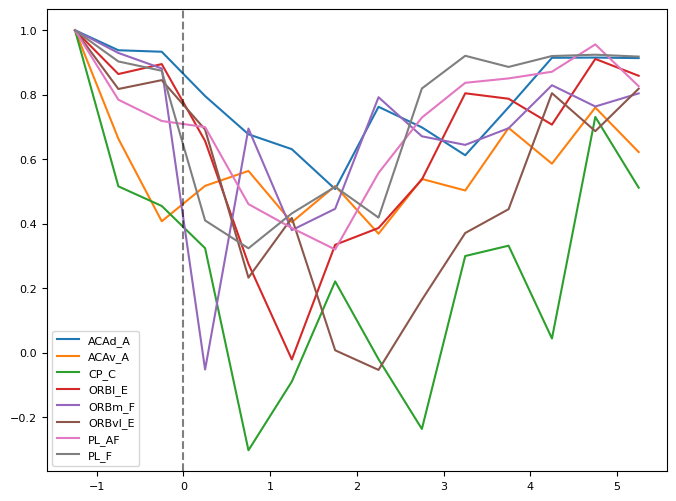

In [14]:
fig,ax=plt.subplots(1,1, figsize=(8, 6))

for key in corr_coefs_by_area_probe.keys():
    ax.plot(sel_rows['bin_center'], corr_coefs_by_area_probe[key], label=key)
ax.axvline(0, color='k', linestyle='--', alpha=0.5)
ax.legend()

In [ ]:
pl.scan_parquet(results_path).columns

In [44]:
#loop over sessions, get coefs, calculate correlation across bins, save per session


sel_session='742903_2024-10-22' 

decoder_coefs = (
    pl.scan_parquet(results_path)
    .filter(
        pl.col('session_id').eq(sel_session),
    )
    .with_columns(
        pl.col('electrode_group_names').flatten().n_unique().eq(1).over(grouping_cols - {'electrode_group_names'}).alias('is_sole_recording'),     
    )
    .filter(
        combine_multi_probe_expr,
        pl.col('is_all_trials').eq(True),
    )
    .sort('structure', 'shift_idx', 'repeat_idx', 'time_aligned_to', 'bin_center', descending=False, maintain_order=True)
    .with_columns([
        pl.col("electrode_group_names").list.n_unique().alias("n_probes"),
        pl.col("electrode_group_names")
        .list.eval(pl.element().str.replace("probe", ""))
        .list.join("")
        .alias("probe")
    ])
    .collect()
)





In [46]:
# decoder_coefs = decoder_coefs.with_columns(
#     pl.col("electrode_group_names")
#       .list.eval(pl.element().str.replace("probe", ""))
#       .list.join("")
#       .alias("probe")
# )

# decoder_coefs.filter(
#     pl.col('is_sole_recording').eq(False)
# )
# decoder_coefs.with_columns([
#         pl.col("electrode_group_names").list.eval(
#             pl.element().str.replace("probe", "").flatten().list.join(pl.lit(", "))
#         ).alias("probe_letters")
# ])

In [47]:
decoder_coefs_pd=decoder_coefs.to_pandas()

In [38]:
decoder_coefs_pd.query('structure==@sel_structure')['probe_letters'][0]

array(['A'], dtype=object)

In [65]:
corr_coefs_by_area_probe = {
    'session_id':[],
    'structure':[],
    'probe':[],
    'shift_idx':[],
    'comp_idx':[],
    'bin_center':[],
    'corr_coefs':[],
}

sel_time_aligned_to='stim_start_time'
# sel_repeat=0
sel_shift_idx=0

for sel_structure in decoder_coefs_pd['structure'].unique():
    unique_probes=decoder_coefs_pd.query('structure==@sel_structure')['probe'].unique()

    for sel_comp_ind in range(len(decoder_coefs_pd['bin_center'].unique())):

        for sel_probe_ind in range(len(unique_probes)):

            all_corr_coefs = []

            for sel_repeat in decoder_coefs_pd['repeat_idx'].unique():

                if len(unique_probes)>sel_probe_ind:
                    probe_str=unique_probes[sel_probe_ind]
                else:
                    probe_str=unique_probes[0]

                shift_inds = decoder_coefs_pd['shift_idx'].unique()

                sel_rows=decoder_coefs_pd.query(f'structure == "{sel_structure}" and shift_idx.isna() and \
                                                repeat_idx == {sel_repeat} and time_aligned_to == "{sel_time_aligned_to}"')
                
                if len(unique_probes)>1:
                    sel_rows=sel_rows.query('probe==@probe_str')
                
                initial_coefs=sel_rows['coefs'].values[sel_comp_ind]
                initial_unit_ids=sel_rows['unit_ids'].values[sel_comp_ind]

                corr_coefs=[]

                for idx, row in sel_rows.iterrows():
                    
                    unit_ids=np.sort(row['unit_ids'])
                    coefs=row['coefs']
                    
                    if np.array_equal(np.sort(initial_unit_ids), unit_ids):
                        corr_coefs.append(np.corrcoef(initial_coefs, coefs)[0,1])
                    else:
                        print(f"Unit ids in time bin {row['bin_center']} do not match initial bin in \n repeat {sel_repeat}, structure {sel_structure}, shift_idx {sel_shift_idx}, time_aligned_to {sel_time_aligned_to}")
                        corr_coefs.append(np.nan)

                all_corr_coefs.append(np.array(corr_coefs))

            # corr_coefs_by_area_probe[sel_structure+'_'+probe_str] = np.array(corr_coefs)
            corr_coefs_by_area_probe['session_id'].append(sel_session)
            corr_coefs_by_area_probe['structure'].append(sel_structure)
            corr_coefs_by_area_probe['probe'].append(probe_str)
            corr_coefs_by_area_probe['shift_idx'].append(sel_shift_idx)
            corr_coefs_by_area_probe['comp_idx'].append(sel_comp_ind)
            corr_coefs_by_area_probe['bin_center'].append(sel_rows['bin_center'].values[sel_comp_ind])
            corr_coefs_by_area_probe['corr_coefs'].append(np.nanmean(np.vstack(all_corr_coefs),axis=0))

corr_coefs_by_area_probe = pd.DataFrame(corr_coefs_by_area_probe)

    # all_corr_coefs

In [ ]:
# corr_coefs_by_area_probe.to_parquet(r"D:\test.parquet")

In [52]:
decoder_coefs_pd['shift_idx']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7695   NaN
7696   NaN
7697   NaN
7698   NaN
7699   NaN
Name: shift_idx, Length: 7700, dtype: float64

In [51]:
sel_rows

,balanced_accuracy_test,balanced_accuracy_train,time_aligned_to,bin_size,bin_center,shift_idx,repeat_idx,predict_proba,trial_indices,unit_ids,coefs,is_all_trials,session_id,structure,electrode_group_names,unit_subsample_size,unit_criteria,is_sole_recording,n_probes,probe


In [66]:
corr_coefs_by_area_probe

,session_id,structure,probe,shift_idx,comp_idx,bin_center,corr_coefs
0,742903_2024-10-22,ACAd,A,0,0,-1.25,"[1.0, 0.8558000071687082, 0.6449303284438969, ..."
1,742903_2024-10-22,ACAd,A,0,1,-0.75,"[0.8558000071687082, 1.0, 0.6909364323894617, ..."
2,742903_2024-10-22,ACAd,A,0,2,-0.25,"[0.6449303284438969, 0.6909364323894617, 1.0, ..."
3,742903_2024-10-22,ACAd,A,0,3,0.25,"[0.5586100542872168, 0.5783475138515084, 0.573..."
4,742903_2024-10-22,ACAd,A,0,4,0.75,"[0.6597276978671408, 0.5797994401937764, 0.476..."
...,...,...,...,...,...,...,...
303,742903_2024-10-22,VISal,D,0,9,3.25,"[0.6453154709700277, 0.48848900172807136, 0.39..."
304,742903_2024-10-22,VISal,D,0,10,3.75,"[0.6603903187767485, 0.7090032424234347, 0.733..."
305,742903_2024-10-22,VISal,D,0,11,4.25,"[0.8219102965072043, 0.7867610556665281, 0.780..."
306,742903_2024-10-22,VISal,D,0,12,4.75,"[0.9573249208157862, 0.8487333769542862, 0.781..."


(0.0, 1.0)

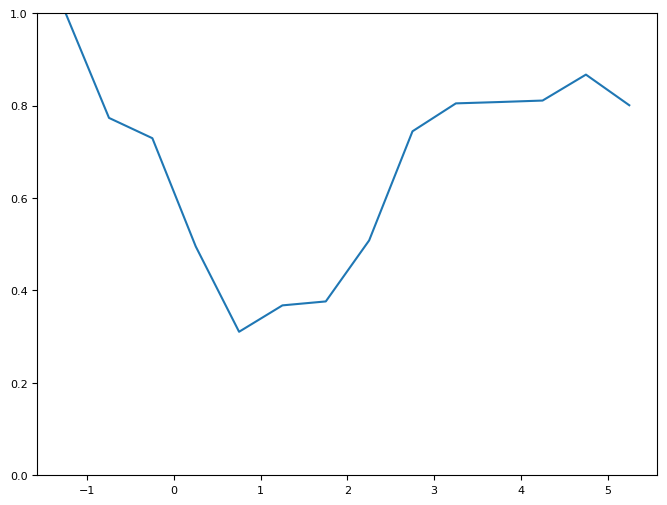

In [71]:
sel_structure='PL'
probe_str='AF'
comp_ind=0
sel_data=corr_coefs_by_area_probe.query('structure==@sel_structure and probe==@probe_str and comp_idx==0').sort_values(by='comp_idx')
bin_centers=corr_coefs_by_area_probe.query('structure==@sel_structure and probe==@probe_str')['bin_center'].values

fig,ax=plt.subplots(1,1, figsize=(8, 6))
ax.plot(bin_centers, sel_data['corr_coefs'].values[0], label=f"{sel_structure} - {probe_str} - comp_idx: {comp_ind}")
ax.set_ylim(0,1)

In [70]:
sel_data['bin_center']

182   -1.25
Name: bin_center, dtype: float64

In [ ]:
#load processed coefs

In [305]:
processed_coefs_path=r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\time_mod_keep_units_consistent_0_2025-06-15\coef_correlation_by_session\\"
processed_coefs = (
    pl.scan_parquet(processed_coefs_path)
    .with_columns(pl.col("probe").str.len_chars().alias("n_probes"))
).collect()

In [318]:
processed_coefs.to_pandas().to_parquet(r"\\allen\programs\mindscope\workgroups\dynamicrouting\Ethan\CO decoding results\time_mod_keep_units_consistent_0_2025-06-15\consolidated_coefs.parquet")

In [244]:
# processed_coefs=processed_coefs.with_columns(
#     pl.col("probe").str.len_chars().alias("n_probes")
# )

In [309]:
dr_sessions=(
    session_table.filter(
    pl.col('project')=="DynamicRouting",
    pl.col('is_production'),
    pl.col('is_annotated'),
    pl.col('issues')=="",
    pl.col('is_good_behavior').eq(True),
    )['session_id'].to_list()
    )

In [310]:
templeton_sessions=(
    session_table.filter(
    pl.col('project')=="Templeton",
    pl.col('is_production'),
    pl.col('is_annotated'),
    pl.col('issues')=="",
    # pl.col('is_good_behavior').eq(True),
    )['session_id'].to_list()
    )
# templeton_sessions

In [311]:
processed_coefs

session_id,structure,probe,shift_idx,comp_idx,bin_center,corr_coefs,n_probes
str,str,str,f64,i64,f64,list[f64],u32
"""620263_2022-07-26""","""ACAd""","""F""",null,0,-1.25,"[1.0, -0.883122, … -0.738514]",1
"""620263_2022-07-26""","""ACAd""","""F""",null,1,-0.75,"[-0.883122, 1.0, … 0.790521]",1
"""620263_2022-07-26""","""ACAd""","""F""",null,2,-0.25,"[0.773056, -0.803316, … -0.657631]",1
"""620263_2022-07-26""","""ACAd""","""F""",null,3,0.25,"[0.624704, -0.685712, … -0.660815]",1
"""620263_2022-07-26""","""ACAd""","""F""",null,4,0.75,"[-0.836493, 0.830948, … 0.886087]",1
…,…,…,…,…,…,…,…
"""761583_2024-12-17""","""VPM""","""C""",null,9,3.25,"[0.387593, 0.516597, … 0.375611]",1
"""761583_2024-12-17""","""VPM""","""C""",null,10,3.75,"[0.174447, 0.401056, … 0.146026]",1
"""761583_2024-12-17""","""VPM""","""C""",null,11,4.25,"[0.405624, 0.342451, … 0.219623]",1


In [377]:
# sel_structure='CP'
figsavepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2025-06-17-decoder-coefs\area heatmaps"

for sel_structure in processed_coefs['structure'].unique():

    n_sessions = processed_coefs.filter(
        pl.col('structure').eq(sel_structure),
        pl.col('n_probes').eq(1),
        pl.col('session_id').is_in(dr_sessions),
    ).select(
        pl.col('session_id')
    ).n_unique()

    structure_results=processed_coefs.filter(
        pl.col('structure').eq(sel_structure),
        pl.col('n_probes').eq(1),
        pl.col('session_id').is_in(dr_sessions),
    ).group_by(
        pl.col('bin_center')
    ).agg(
        pl.col('corr_coefs')
    ).sort(
        pl.col('bin_center'),
        maintain_order=True
    )

    if len(structure_results['bin_center']) == 0:
        print(f"No data for structure {sel_structure} with {n_sessions} sessions.")
        continue

    corrcoef_matrix = np.zeros((len(structure_results['bin_center']), len(structure_results['bin_center'])))

    for ib,bb in enumerate(structure_results['bin_center']):
        bin_results = np.vstack(structure_results.to_pandas().query(f"bin_center == {bb}")['corr_coefs'].values[0])
        mean_bin_results = np.nanmean(bin_results, axis=0)
        corrcoef_matrix[ib,:] = mean_bin_results

    fig,ax=plt.subplots(1,1, figsize=(8, 6))
    im=ax.imshow(corrcoef_matrix, aspect='auto', cmap='viridis', interpolation='none', vmin=0, vmax=1,
                extent=[structure_results['bin_center'].min()-0.25, structure_results['bin_center'].max()+0.25, 
                        structure_results['bin_center'].max()+0.25, structure_results['bin_center'].min()-0.25, ])
    ax.invert_yaxis()
    ax.set_title(f"{sel_structure} - {n_sessions} sessions")
    ax.set_xlabel('Time relative to stim start')
    ax.set_ylabel('Time bin used to compute correlation')

    #colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label('Correlation of Coefficients', rotation=270, labelpad=20)

    #save figure
    sel_structure = sel_structure.replace('/', '-')
    fig.savefig(os.path.join(figsavepath, f"{sel_structure}_heatmap.png"), bbox_inches='tight', dpi=150)
    plt.close(fig)

No data for structure PR with 0 sessions.
No data for structure FF with 0 sessions.
No data for structure BLAp with 0 sessions.
No data for structure DTN with 0 sessions.
No data for structure CA2 with 0 sessions.
No data for structure V3 with 0 sessions.
No data for structure ECT6b with 0 sessions.
No data for structure out of brain with 0 sessions.
No data for structure LHA with 0 sessions.
No data for structure PSTN with 0 sessions.
No data for structure LSv with 0 sessions.
No data for structure OP with 0 sessions.
No data for structure IAD with 0 sessions.
No data for structure GRN with 0 sessions.
No data for structure CS with 0 sessions.
No data for structure SCop with 0 sessions.
No data for structure ECT2/3 with 0 sessions.
No data for structure MS with 0 sessions.


In [339]:
n_sessions

20

In [375]:
structure_results

bin_center,corr_coefs
f64,list[list[f64]]


In [362]:
corrcoef_matrix = np.zeros((len(structure_results['bin_center']), len(structure_results['bin_center'])))

for ib,bb in enumerate(structure_results['bin_center']):
    bin_results = np.vstack(structure_results.to_pandas().query(f"bin_center == {bb}")['corr_coefs'].values[0])
    mean_bin_results = np.nanmean(bin_results, axis=0)
    corrcoef_matrix[ib,:] = mean_bin_results

corrcoef_matrix

array([[1.        , 0.81693453, 0.79846152, 0.59464214, 0.57170124,
        0.61876495, 0.63052361, 0.66672613, 0.7105232 , 0.74665031,
        0.77221987, 0.81418764, 0.84360546, 0.83828373],
       [0.81693453, 1.        , 0.82480544, 0.61301134, 0.56815095,
        0.60138756, 0.62840594, 0.63236963, 0.70127399, 0.70886546,
        0.74879169, 0.78512374, 0.83054069, 0.85696003],
       [0.79846152, 0.82480544, 1.        , 0.61782299, 0.55902693,
        0.59520192, 0.6204382 , 0.6291395 , 0.67969087, 0.69137248,
        0.74258786, 0.77771787, 0.78424773, 0.82256655],
       [0.59464214, 0.61301134, 0.61782299, 1.        , 0.63920254,
        0.57188545, 0.5655308 , 0.53818364, 0.54102797, 0.53817436,
        0.56088935, 0.55949159, 0.58859405, 0.61171913],
       [0.57170124, 0.56815095, 0.55902693, 0.63920254, 1.        ,
        0.74543712, 0.67181896, 0.62401751, 0.59344788, 0.57601816,
        0.56862366, 0.58174098, 0.56252893, 0.56329145],
       [0.61876495, 0.60138756, 0.5

In [ ]:
# np.nanmean(np.vstack(structure_results.to_pandas().query(f"bin_center == {bb}")['corr_coefs'].values[0]),axis=0)

fig,ax=

array([1.        , 0.81693453, 0.79846152, 0.59464214, 0.57170124,
       0.61876495, 0.63052361, 0.66672613, 0.7105232 , 0.74665031,
       0.77221987, 0.81418764, 0.84360546, 0.83828373])

In [ ]:
np.mean(np.vstack(structure_results['corr_coefs'][0].to_numpy()),axis=0)

array([1.        , 0.93358504, 0.88186786, 0.74844807, 0.6571198 ,
       0.60532302, 0.69069562, 0.70139751, 0.78833726, 0.81793327,
       0.88878554, 0.95745889, 0.95076734, 0.94760872])

In [347]:
# Assuming you have a polars DataFrame `processed_coefs` with columns: 'structure', 'bin_center', 'corr_coefs'
# and 'corr_coefs' is a list/array column

mean_coefs = (
    processed_coefs
    .group_by(['structure', 'bin_center'])
    .agg(
        pl.col('corr_coefs').list.eval(pl.element().mean()).alias('mean_corr_coefs')
    )
)

mean_coefs

structure,bin_center,mean_corr_coefs
str,f64,list[list[f64]]
"""Eth""",0.25,"[[0.305799], [0.259858], … [0.391666]]"
"""FF""",0.75,"[[0.573813], [0.542514]]"
"""FRP""",0.75,"[[0.373528], [0.547349], … [0.552007]]"
"""STR""",2.75,"[[0.590282], [0.227713], … [0.471776]]"
"""SCm""",1.25,"[[0.073561], [0.531927], … [0.483789]]"
…,…,…
"""STR""",3.75,"[[0.70822], [0.220839], … [0.623739]]"
"""ORBl""",3.25,"[[0.004884], [0.505213], … [0.561222]]"
"""VL""",5.25,"[[0.741081], [0.741257], … [0.742873]]"


In [ ]:



sel_structure='PL'
test=decoder_coefs_mean.filter(
    pl.col('structure').eq(sel_structure),
    pl.col('time_aligned_to').eq('stim_start_time'),
    pl.col('is_sole_recording').eq(True),
)['mean_coef_corr_matrix'].mean()

fig,ax=plt.subplots(1,1,figsize=(8,6))
im=ax.imshow(test, aspect='auto', cmap='viridis', interpolation='none', vmin=0, vmax=1,
             extent=[sel_rows['bin_center'].min()-0.25, sel_rows['bin_center'].max()+0.25, 
                     sel_rows['bin_center'].max()+0.25, sel_rows['bin_center'].min()-0.25, ])

ax.invert_yaxis()
ax.set_title(f"{sel_structure}; probe {probe_str}; shift_idx: {sel_shift_idx}; time_aligned_to: {sel_time_aligned_to}")
ax.set_xlabel('time rel to '+sel_time_aligned_to)

In [379]:
import npc_lims

In [380]:
all_trials=pd.read_parquet(
    npc_lims.get_cache_path('trials',version='v0.0.268')
)

In [381]:
trials=all_trials.query('session_id=="742903_2024-10-22"')

In [ ]:
trials.query('is_response==True and rewarded_modality=="vis"')['stim_name'].value_counts()

In [ ]:
trials.query('is_response==True and rewarded_modality=="aud"')['stim_name'].value_counts()

In [382]:
trials=pl.read_parquet(
    npc_lims.get_cache_path('trials',version='v0.0.268')
).filter(
    pl.col('session_id').eq("742903_2024-10-22")
)

In [387]:
trials.filter(
    pl.col('is_target')
).with_columns(
    pl.col('is_vis_target').and(all_trials['is_response'])
)

SyntaxError: invalid syntax (3057209706.py, line 4)

In [420]:
trials=trials.filter(
    pl.col('is_target'),
    # pl.col('is_hit').eq(False)
).with_columns(
    (((pl.col("is_vis_target")==True) & (pl.col("is_response")==True)) |
     ((pl.col("is_aud_target")==True) & (pl.col("is_response")==False))
    ).alias("is_vis_appropriate_response"),
).with_columns(
    (pl.when(pl.col("is_vis_appropriate_response")==True)
        .then(pl.lit("vis"))
        .otherwise(pl.lit("aud"))
    ).alias("context_appropriate_for_response")
)

In [421]:
trials

start_time,stop_time,quiescent_start_time,quiescent_stop_time,stim_start_time,stim_stop_time,response_window_start_time,response_window_stop_time,task_control_response_time,response_time,reward_time,post_response_window_start_time,post_response_window_stop_time,stim_name,block_index,rewarded_modality,trial_index,trial_index_in_block,repeat_index,is_response,is_correct,is_incorrect,is_hit,is_false_alarm,is_correct_reject,is_miss,is_go,is_nogo,is_rewarded,is_noncontingent_reward,is_contingent_reward,is_reward_scheduled,is_instruction,is_aud_stim,is_vis_stim,is_catch,is_target,is_aud_target,is_vis_target,is_nontarget,is_aud_nontarget,is_vis_nontarget,is_vis_rewarded,is_aud_rewarded,is_block_switch,is_repeat,is_opto,session_idx,date,subject_id,session_id,id,is_vis_appropriate_response,context_appropriate_for_response
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str,i64,f64,f64,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,i64,date,i64,str,i64,bool,str
2572.34721,2577.85183,2572.34721,2573.81515,2573.879,2574.3794,2573.93187,2574.84931,2574.34886,2574.34089,null,2574.87984,2577.88236,"""vis1""",0,"""aud""",7,7.0,0.0,true,false,true,false,true,false,false,false,true,false,false,false,false,false,false,true,false,true,false,true,false,false,false,false,true,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",7,true,"""vis"""
2620.70437,2626.20927,2620.70437,2622.17225,2622.23577,2622.73616,2622.28908,2623.20647,null,null,null,2623.2366,2626.2391,"""vis1""",0,"""aud""",13,13.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,true,false,true,false,true,false,false,false,false,true,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",13,false,"""aud"""
2626.32576,2631.83038,2626.32576,2627.79363,2627.85761,2628.35802,2627.91059,2628.82785,null,null,null,2628.85845,2631.86096,"""vis1""",0,"""aud""",14,14.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,true,false,true,false,true,false,false,false,false,true,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",14,false,"""aud"""
2646.72613,2652.23079,2646.72613,2648.19407,2648.25751,2648.75787,2648.31082,2649.22823,null,null,null,2649.25828,2652.26086,"""vis1""",0,"""aud""",16,16.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,true,false,true,false,true,false,false,false,false,true,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",16,false,"""aud"""
2687.79387,2693.31519,2687.79387,2689.26179,2689.3252,2689.82566,2689.37855,2690.29595,null,null,null,2690.32603,2693.34634,"""vis1""",0,"""aud""",22,22.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,false,true,false,true,false,true,false,false,false,false,true,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",22,false,"""aud"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6114.34716,6119.88508,6114.34716,6115.81508,6115.85619,6116.35619,6115.93178,6116.84925,null,null,null,6116.87963,6119.91552,"""sound1""",5,"""vis""",532,83.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,true,false,false,true,true,false,false,false,false,true,false,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",532,true,"""vis"""
6127.12447,6132.64583,6127.12447,6128.5924,6128.63383,6129.13383,6128.70917,6129.62661,null,null,null,6129.65701,6132.67614,"""sound1""",5,"""vis""",534,85.0,0.0,false,true,false,false,false,true,false,false,true,false,false,false,false,false,true,false,false,true,true,false,false,false,false,true,false,false,false,false,0,2024-10-22,742903,"""742903_2024-10-22""",534,true,"""vis"""
6132.92938,6138.48401,6132.92938,6134.41396,6134.47766,6134.97814,6134.53072,6135.44814,null,null,null,6135.47852,6138.51442,""

In [410]:
trials.unique(
    subset='rewarded_modality',
).select(
    pl.col('rewarded_modality')
).sort(
    pl.col('rewarded_modality'),
    descending=False
)

rewarded_modality
str
"""aud"""
"""vis"""


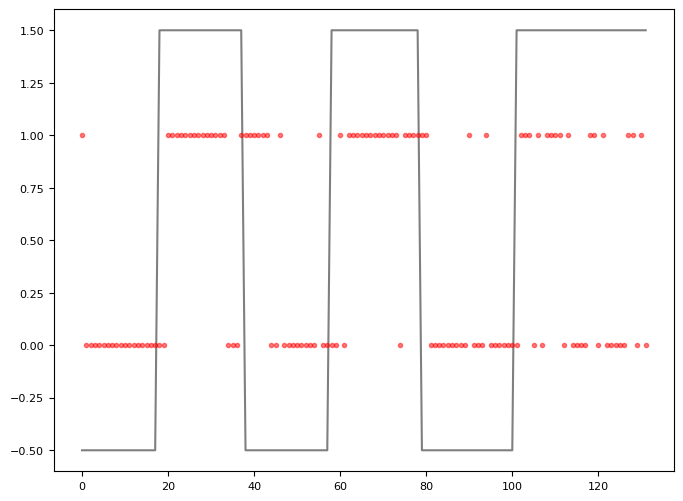

In [418]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(trials['is_vis_rewarded'].to_numpy()*2-0.5, 'k-', alpha=0.5)
ax.plot(trials['is_vis_appropriate_response'], 'r.', alpha=0.5)